In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import os
import cv2
from keras import applications 
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D, GaussianNoise, BatchNormalization
import matplotlib.image as mpimg
from keras.preprocessing import image
import pandas as pd
from matplotlib import pyplot

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#image pre processing 
#resources used: https://www.geeksforgeeks.org/apply-changes-to-all-the-images-in-given-folder-using-python-pil/
# https://opensource.com/life/15/2/resize-images-python  

# Code to apply operations on all the images
# present in a folder one by one
# operations such as rotating, cropping, 
from PIL import Image
from PIL import ImageFilter
import os

#for uploading images back into drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#finding minimum image width + height

# set an initial value which no image will meet
minw = 10000000
minh = 10000000
# path of the folder containing the raw images

path ="/content/drive/MyDrive/BMEN415_Group_Folder/images/chest_xray/test/NORMAL"
for image in os.listdir(path):
    # get the image height & width
    image_location = os.path.join(path, image)
    im = Image.open(image_location)
    data = im.size
    # if the width is lower than the last image, we have a new "winner"
    w = data[0]
    if w < minw:
        newminw = w, image_location
        minw = w
    # if the height is lower than the last image, we have a new "winner"
    h = data[1]
    if h < minh:
        newminh = h, image_location
        minh = h
# finally, print the values and corresponding files
print("minwidth", newminw)
print("minheight", newminh)

In [ ]:
#finding minimum image width + height

# set an initial value which no image will meet
minw = 10000000
minh = 10000000
path2 ="/content/drive/MyDrive/BMEN415_Group_Folder/images/chest_xray_processed/test/PNEUMONIA"
for image in os.listdir(path2):
    # get the image height & width
    image_location = os.path2.join(path2, image)
    im = Image.open(image_location)
    data = im.size
    # if the width is lower than the last image, we have a new "winner"
    w = data[0]
    if w < minw:
        newminw = w, image_location
        minw = w
    # if the height is lower than the last image, we have a new "winner"
    h = data[1]
    if h < minh:
        newminh = h, image_location
        minh = h
# finally, print the values and corresponding files
print("minwidth", newminw)
print("minheight", newminh)

In [ ]:
#!!!!!!!!!!!!!!!!!!!!!!!!DO NOT RE-RUN THIS CELL -> IMAGES HAVE ALREADY BEEN PREPROCESSED!!!!!!!!!!!!!!!!!!!!!!!!
# path of the folder containing the raw images
inPath ="/content/drive/MyDrive/BMEN415_Group_Folder/images/chest_xray/test/NORMAL"

# path of the folder that will contain the modified image
outPath ="/content/drive/MyDrive/BMEN415_Group_Folder/images/chest_xray_processed/test/NORMAL"

for imagePath in os.listdir(inPath):
    # imagePath contains name of the image 
    inputPath = os.path.join(inPath, imagePath)

    # inputPath contains the full directory name
    img = Image.open(inputPath)

    fullOutPath = os.path.join(outPath, 'processed_'+imagePath)
        # fullOutPath contains the path of the output
        # image that needs to be generated
    # img =img.convert('L') #converting to black and white 

    #scaling image by width 
    basewidth = 984 #set this to what we want our image width to be
    #scaling image by heigt 
    baseheight = 496 #set this to what we want our image height to be
    wpercent = (basewidth / float(img.size[0]))
    hsize = int((float(img.size[1]) * float(wpercent)))
    hpercent = (baseheight / float(img.size[1]))
    wsize = int((float(img.size[0]) * float(hpercent)))
    img = img.resize((basewidth, baseheight), Image.ANTIALIAS).convert('L')
    img.save(fullOutPath)

    print(fullOutPath)

In [ ]:
#!!!!!!!!!!!!!!!!!!!!!!!!DONT RE-RUN THIS CELL -> IMAGES HAVE ALREADY BEEN PREPROCESSED!!!!!!!!!!!!!!!!!!!!!!!!
# path of the folder containing the raw images
inPath ="/content/drive/MyDrive/BMEN415_Group_Folder/images/chest_xray/test/PNEUMONIA"

# path of the folder that will contain the modified image
outPath ="/content/drive/MyDrive/BMEN415_Group_Folder/images/chest_xray_processed/test/PNEUMONIA"

for imagePath in os.listdir(inPath):
    # imagePath contains name of the image 
    inputPath = os.path.join(inPath, imagePath)

    # inputPath contains the full directory name
    img = Image.open(inputPath)

    fullOutPath = os.path.join(outPath, 'processed_'+imagePath)
        # fullOutPath contains the path of the output
        # image that needs to be generated
    # img =img.convert('L') #converting to black and white 

    #scaling image by width 
    basewidth = 984 #set this to what we want our image width to be
    #scaling image by heigt 
    baseheight = 496 #set this to what we want our image height to be
    wpercent = (basewidth / float(img.size[0]))
    hsize = int((float(img.size[1]) * float(wpercent)))
    hpercent = (baseheight / float(img.size[1]))
    wsize = int((float(img.size[0]) * float(hpercent)))
    img = img.resize((basewidth, baseheight), Image.ANTIALIAS).convert('L')
    img.save(fullOutPath)

    print(fullOutPath)

In [ ]:
#!!!!!!!!!!!!!!!!!!!!!!!!DONT RE-RUN THIS CELL -> IMAGES HAVE ALREADY BEEN PREPROCESSED!!!!!!!!!!!!!!!!!!!!!!!!
# path of the folder containing the raw images
inPath ="/content/drive/MyDrive/BMEN415_Group_Folder/images/chest_xray/train/NORMAL"

# path of the folder that will contain the modified image
outPath ="/content/drive/MyDrive/BMEN415_Group_Folder/images/chest_xray_processed/train/NORMAL"

for imagePath in os.listdir(inPath):
    # imagePath contains name of the image 
    inputPath = os.path.join(inPath, imagePath)

    # inputPath contains the full directory name
    img = Image.open(inputPath)

    fullOutPath = os.path.join(outPath, 'processed_'+imagePath)
        # fullOutPath contains the path of the output
        # image that needs to be generated
    # img =img.convert('L') #converting to black and white 

    #scaling image by width 
    basewidth = 984 #set this to what we want our image width to be
    #scaling image by heigt 
    baseheight = 496 #set this to what we want our image height to be
    wpercent = (basewidth / float(img.size[0]))
    hsize = int((float(img.size[1]) * float(wpercent)))
    hpercent = (baseheight / float(img.size[1]))
    wsize = int((float(img.size[0]) * float(hpercent)))
    img = img.resize((basewidth, baseheight), Image.ANTIALIAS).convert('L')
    img.save(fullOutPath)

    print(fullOutPath)

In [ ]:
#!!!!!!!!!!!!!!!!!!!!!!!!DONT RE-RUN THIS CELL -> IMAGES HAVE ALREADY BEEN PREPROCESSED!!!!!!!!!!!!!!!!!!!!!!!!
# path of the folder containing the raw images
inPath ="/content/drive/MyDrive/BMEN415_Group_Folder/images/chest_xray/train/PNEUMONIA"

# path of the folder that will contain the modified image
outPath ="/content/drive/MyDrive/BMEN415_Group_Folder/images/chest_xray_processed/train/PNEUMONIA"

for imagePath in os.listdir(inPath):
    # imagePath contains name of the image 
    inputPath = os.path.join(inPath, imagePath)

    # inputPath contains the full directory name
    img = Image.open(inputPath)

    fullOutPath = os.path.join(outPath, 'processed_'+imagePath)
        # fullOutPath contains the path of the output
        # image that needs to be generated
    # img =img.convert('L') #converting to black and white 

    #scaling image by width 
    basewidth = 984 #set this to what we want our image width to be
    #scaling image by heigt 
    baseheight = 496 #set this to what we want our image height to be
    wpercent = (basewidth / float(img.size[0]))
    hsize = int((float(img.size[1]) * float(wpercent)))
    hpercent = (baseheight / float(img.size[1]))
    wsize = int((float(img.size[0]) * float(hpercent)))
    img = img.resize((basewidth, baseheight), Image.ANTIALIAS).convert('L')
    img.save(fullOutPath)

    print(fullOutPath)

In [ ]:
#!!!!!!!!!!!!!!!!!!!!!!!!DONT RE-RUN THIS CELL -> IMAGES HAVE ALREADY BEEN PREPROCESSED!!!!!!!!!!!!!!!!!!!!!!!!
# path of the folder containing the raw images
inPath ="/content/drive/MyDrive/BMEN415_Group_Folder/images/chest_xray/val/NORMAL"

# path of the folder that will contain the modified image
outPath ="/content/drive/MyDrive/BMEN415_Group_Folder/images/chest_xray_processed/val/NORMAL"

for imagePath in os.listdir(inPath):
    # imagePath contains name of the image 
    inputPath = os.path.join(inPath, imagePath)

    # inputPath contains the full directory name
    img = Image.open(inputPath)

    fullOutPath = os.path.join(outPath, 'processed_'+imagePath)
        # fullOutPath contains the path of the output
        # image that needs to be generated
    # img =img.convert('L') #converting to black and white 

    #scaling image by width 
    basewidth = 984 #set this to what we want our image width to be
    #scaling image by heigt 
    baseheight = 496 #set this to what we want our image height to be
    wpercent = (basewidth / float(img.size[0]))
    hsize = int((float(img.size[1]) * float(wpercent)))
    hpercent = (baseheight / float(img.size[1]))
    wsize = int((float(img.size[0]) * float(hpercent)))
    img = img.resize((basewidth, baseheight), Image.ANTIALIAS).convert('L')
    img.save(fullOutPath)

    print(fullOutPath)

In [ ]:
#!!!!!!!!!!!!!!!!!!!!!!!!DONT RE-RUN THIS CELL -> IMAGES HAVE ALREADY BEEN PREPROCESSED!!!!!!!!!!!!!!!!!!!!!!!!
# path of the folder containing the raw images
inPath ="/content/drive/MyDrive/BMEN415_Group_Folder/images/chest_xray/val/PNEUMONIA"

# path of the folder that will contain the modified image
outPath ="/content/drive/MyDrive/BMEN415_Group_Folder/images/chest_xray_processed/val/PNEUMONIA"

for imagePath in os.listdir(inPath):
    # imagePath contains name of the image 
    inputPath = os.path.join(inPath, imagePath)

    # inputPath contains the full directory name
    img = Image.open(inputPath)

    fullOutPath = os.path.join(outPath, 'processed_'+imagePath)
        # fullOutPath contains the path of the output
        # image that needs to be generated
    # img =img.convert('L') #converting to black and white 

    #scaling image by width 
    basewidth = 984 #set this to what we want our image width to be
    #scaling image by heigt 
    baseheight = 496 #set this to what we want our image height to be
    wpercent = (basewidth / float(img.size[0]))
    hsize = int((float(img.size[1]) * float(wpercent)))
    hpercent = (baseheight / float(img.size[1]))
    wsize = int((float(img.size[0]) * float(hpercent)))
    img = img.resize((basewidth, baseheight), Image.ANTIALIAS).convert('L')
    img.save(fullOutPath)

    print(fullOutPath)

In [4]:
train_dir = "/content/drive/MyDrive/BMEN415_Group_Folder/images/chest_xray_processed/train"
test_dir = "/content/drive/MyDrive/BMEN415_Group_Folder/images/chest_xray_processed/test"
val_dir = "/content/drive/MyDrive/BMEN415_Group_Folder/images/chest_xray_processed/val"


In [ ]:
print("Training set size:")
num_pneumonia = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
print(f"PNEUMONIA={num_pneumonia}")
print(f"NORMAL={num_normal}")
print()

print("Test set size:")
print(f"PNEUMONIA={len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(test_dir, 'NORMAL')))}")
print()

print("Validation set size")
print(f"PNEUMONIA={len(os.listdir(os.path.join(val_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(val_dir, 'NORMAL')))}")

Training set size:
PNEUMONIA=3875
NORMAL=1341

Test set size:
PNEUMONIA=390
NORMAL=234

Validation set size
PNEUMONIA=8
NORMAL=8


In [5]:
img_Datagen = ImageDataGenerator(
        rescale = 1/255,
        shear_range=10,
        zoom_range=0.3,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.5,2.0],
        width_shift_range = 0.2,
        rotation_range=20,
        fill_mode = 'nearest'
)
val_Datagen = ImageDataGenerator(
        rescale = 1/255
)

In [6]:
train = img_Datagen.flow_from_directory(train_dir,
                                       batch_size=32,
                                       class_mode='binary',
                                      target_size=(224,224)
                                       )

test = val_Datagen.flow_from_directory(test_dir,
                                       batch_size=2,
                                       class_mode='binary',
                                       target_size=(224,224)
                                      ) 
val = val_Datagen.flow_from_directory(val_dir,
                                      batch_size=2,
                                      class_mode='binary',
                                      target_size=(224,224)
                                      )     

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [7]:
image, label = next(train)

In [8]:
from keras.layers import Input
from keras.models import Model

from keras import applications
base_model = tf.keras.applications.ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

globavgpool_out  = GlobalAveragePooling2D()(base_model.output)
dense_01 = Dense(128, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.001))(globavgpool_out)
predictions      = tf.keras.layers.Dense(1, activation='sigmoid')(dense_01)
model            = Model(inputs=base_model.inputs,outputs=predictions)

94683136/94668760 [==============================] - 0s 0us/step


In [9]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=8)
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
history = model.fit(train,epochs=30, 
                    validation_data=val,
                    steps_per_epoch=100,
                    callbacks=[early_stopping,lr],
                    batch_size=32)

Epoch 1/30
100/100 [==============================] - 544s 5s/step - loss: 0.4354 - accuracy: 0.8775 - val_loss: 0.4006 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 2/30
100/100 [==============================] - 470s 5s/step - loss: 0.3132 - accuracy: 0.9062 - val_loss: 0.3757 - val_accuracy: 0.9375 - lr: 0.0010
Epoch 3/30
100/100 [==============================] - 470s 5s/step - loss: 0.2861 - accuracy: 0.9103 - val_loss: 0.3193 - val_accuracy: 0.9375 - lr: 0.0010
Epoch 4/30
100/100 [==============================] - 467s 5s/step - loss: 0.2721 - accuracy: 0.9181 - val_loss: 0.3331 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 5/30
100/100 [==============================] - 467s 5s/step - loss: 0.2715 - accuracy: 0.9128 - val_loss: 0.3616 - val_accuracy: 0.9375 - lr: 0.0010
Epoch 6/30
100/100 [==============================] - 468s 5s/step - loss: 0.2635 - accuracy: 0.9109 - val_loss: 0.3948 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 7/30
100/100 [==============================] - 474s 5s/st

In [10]:
accuracy = model.evaluate(train)
print(f"Model accuracy on training set is: {accuracy[1]} and the training loss is {accuracy[0]}")

163/163 [==============================] - 788s 5s/step - loss: 0.1725 - accuracy: 0.9459
Model accuracy on training set is: 0.9459356069564819 and the training loss is 0.1724826991558075


In [11]:
accuracy2 = model.evaluate(test)
print(f"Model accuracy on test set is: {accuracy2[1]} and the test loss is {accuracy2[0]}")

312/312 [==============================] - 116s 371ms/step - loss: 0.2569 - accuracy: 0.9054
Model accuracy on test set is: 0.9054487347602844 and the test loss is 0.2568793296813965


Text(0.5, 1.0, 'Accuracy Evolution')

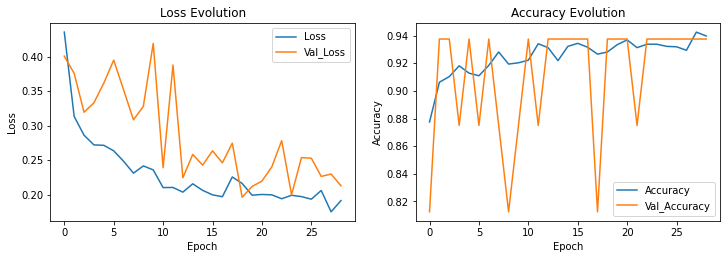

In [12]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val_Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val_Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              